In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import multiprocessing
import os
import neat
import visualize

import warnings
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

def eval_genome(genome, config):
    """
    This function will be run in parallel by ParallelEvaluator.  It takes two
    arguments (a single genome and the genome class configuration data) and
    should return one float (that genome's fitness).

    Note that this function needs to be in module scope for multiprocessing.Pool
    (which is what ParallelEvaluator uses) to find it.  Because of this, make
    sure you check for __main__ before executing any code (as we do here in the
    last few lines in the file), otherwise you'll have made a fork bomb
    instead of a neuroevolution demo. :)
    """
    if_no_connect = True
    
    net = neat.nn.FeedForwardNetwork.create(genome, config)

    # [x_inputs, x_outputs] = sampleing()

    error = 0.0
    for xi, xo in zip(x_inputs, x_outputs):
        output = net.activate(xi)
        error -= (output[0] - xo[0]) ** 2
        # error -= np.abs(output[0] - xo[0])
        if float(output[0]) != 0:
            if_no_connect = False
    
    if if_no_connect:
        mse = -1
    else:
        mse = error/samplesize
    # mad = error/L
    return mse

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)

    # Run for up to 300 generations.
    pe = neat.ParallelEvaluator(multiprocessing.cpu_count(), eval_genome)
    winner = p.run(pe.evaluate, 1000)

    return [stats,winner]

In [3]:
def ackley(a):
    d = len(a)
    term1 = - 20 * np.exp(-0.2*np.sqrt(np.sum(a**2)/d))
    term2 = - np.exp(np.sum(np.cos(a*2*np.pi))/d)
    f = term1 + term2 + 20 + np.exp(1)
    return f

d = 2
samplesize = 1000

def sampleing():
    x_inputs = []
    x_outputs = []
    list_outputs = []

    for i in range(samplesize):
        A = -32.768
        B = 32.768#小数的范围A ~ B
        a = np.random.uniform(A,B,d)
        x_inputs.append(tuple(a/A))
        y = ackley(a)
        list_outputs.append(y)

    for i in range(samplesize):
        # x_outputs.append(tuple([list_outputs[i]/np.max(list_outputs)]))
        x_outputs.append(tuple([list_outputs[i]/24]))
    return [x_inputs, x_outputs]

[x_inputs, x_outputs] = sampleing()

## visualization

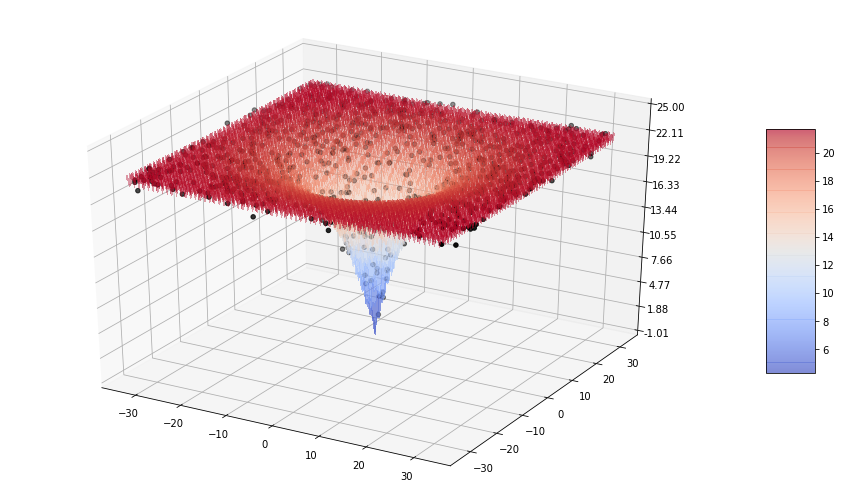

In [4]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize = (16,9))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-32.768, 32.768, 0.25)
Y = np.arange(-32.768, 32.768, 0.25)
X, Y = np.meshgrid(X, Y)

Z = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        a = np.array([X[i][j],Y[i][j]])
        Z.append(ackley(a))
Z = np.array(Z).reshape(X.shape)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.4)

# Customize the z axis.
ax.set_zlim(-1.01, 25)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


x = []
y = []
z = []
for i in range(1000):
    x.append(x_inputs[i][0]*32.768)
    y.append(x_inputs[i][1]*32.768)
    z.append(x_outputs[i][0]*24)

ax.scatter(x, y, z, c='k', marker='o')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [5]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward")

stats_list = []
winner_list = []
for i in range(1):
    [stats,winner] = run(config_path)
    stats_list.append(stats)

    winner_list.append(winner)


 ****** Running generation 0 ****** 

Population's average fitness: -0.81674 stdev: 1.14766
Best fitness: -0.10266 - size: (1, 2) - species 1 - id 39
Average adjusted fitness: 0.934
Mean genetic distance 1.050, standard deviation 0.492
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   100     -0.1    0.934     0
Total extinctions: 0
Generation time: 0.301 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.44844 stdev: 0.46029
Best fitness: -0.01222 - size: (1, 1) - species 1 - id 169
Average adjusted fitness: 0.878
Mean genetic distance 1.547, standard deviation 0.516
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    96     -0.0    0.878     0
     2    0     4       --       --     0
Total extinctions: 0
Generation time: 0.312 sec (0.306 average)

 ****** Running generation 2 ****** 



Population's average fitness: -0.20572 stdev: 0.29775
Best fitness: -0.00940 - size: (3, 6) - species 1 - id 1363
Average adjusted fitness: 0.791
Mean genetic distance 2.166, standard deviation 0.729
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    26     -0.0    0.789     2
     2   15    28     -0.0    0.859    10
     3   10    23     -0.0    0.820     2
     4    4    24     -0.0    0.695     0
Total extinctions: 0
Generation time: 0.464 sec (0.492 average)

 ****** Running generation 17 ****** 

Population's average fitness: -0.21695 stdev: 0.33052
Best fitness: -0.00940 - size: (3, 6) - species 1 - id 1363
Average adjusted fitness: 0.778
Mean genetic distance 2.209, standard deviation 0.744
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    27     -0.0    0.911     3
     2   16    26     -0.0    0.814   

Population's average fitness: -0.20922 stdev: 0.29133
Best fitness: -0.00940 - size: (3, 6) - species 1 - id 1363
Average adjusted fitness: 0.788
Mean genetic distance 2.282, standard deviation 0.829
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   30    25     -0.0    0.776    16
     2   29    26     -0.0    0.877     3
     3   24    26     -0.0    0.865     7
     4   18    22     -0.0    0.633     6
Total extinctions: 0
Generation time: 0.526 sec (0.492 average)

 ****** Running generation 31 ****** 

Population's average fitness: -0.23958 stdev: 0.34645
Best fitness: -0.00940 - size: (3, 6) - species 1 - id 1363
Average adjusted fitness: 0.755
Mean genetic distance 2.290, standard deviation 0.828
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   31    27     -0.0    0.871    17
     2   30    27     -0.0    0.810    

Population's average fitness: -0.26332 stdev: 0.34878
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.728
Mean genetic distance 2.275, standard deviation 0.832
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   44    26     -0.0    0.758     0
     2   43    29     -0.0    0.840    17
     3   38    26     -0.0    0.768     3
     4   32    20     -0.0    0.545    20
Total extinctions: 0
Generation time: 0.479 sec (0.487 average)

 ****** Running generation 45 ****** 

Population's average fitness: -0.21330 stdev: 0.31240
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.784
Mean genetic distance 2.263, standard deviation 0.836
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   45    27     -0.0    0.867     1
     2   44    27     -0.0    0.774   

Population's average fitness: -0.14976 stdev: 0.28110
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.850
Mean genetic distance 2.035, standard deviation 0.784
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   58    29     -0.0    0.831    14
     3   52    33     -0.0    0.866    17
     5    7    37     -0.0    0.852     6
Total extinctions: 0
Generation time: 0.438 sec (0.575 average)

 ****** Running generation 59 ****** 

Population's average fitness: -0.28515 stdev: 0.39660
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.710
Mean genetic distance 2.012, standard deviation 0.727
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   59    35     -0.0    0.735    15
     3   53    29     -0.0    0.534    18
     5    8    36     -0.0    0.861    

Population's average fitness: -0.16757 stdev: 0.28557
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.805
Mean genetic distance 2.264, standard deviation 0.739
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   73    26     -0.0    0.792    29
     3   67    28     -0.0    0.837     7
     5   22    33     -0.0    0.881    21
     6    1    13     -0.0    0.708     0
Total extinctions: 0
Generation time: 0.489 sec (0.508 average)

 ****** Running generation 74 ****** 

Population's average fitness: -0.18713 stdev: 0.30834
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.832
Mean genetic distance 2.305, standard deviation 0.728
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   74    24     -0.0    0.843    30
     3   68    24     -0.0    0.664    

Population's average fitness: -0.14204 stdev: 0.25906
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.857
Mean genetic distance 2.297, standard deviation 0.752
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   87    21     -0.0    0.867    43
     3   81    20     -0.0    0.927     0
     5   36    19     -0.0    0.828    13
     6   15    21     -0.0    0.825     6
     7    8    19     -0.0    0.836     6
Total extinctions: 0
Generation time: 0.489 sec (0.499 average)

 ****** Running generation 88 ****** 

Population's average fitness: -0.20688 stdev: 0.29551
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.795
Mean genetic distance 2.301, standard deviation 0.756
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   88    20     -0.0    0.823   

Population's average fitness: -0.19982 stdev: 0.32358
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.804
Mean genetic distance 2.338, standard deviation 0.791
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  100    21     -0.0    0.841    56
     3   94    19     -0.0    0.934     6
     5   49    19     -0.0    0.681    26
     6   28    22     -0.0    0.796     2
     7   21    19     -0.0    0.768    19
Total extinctions: 0
Generation time: 0.504 sec (0.467 average)

 ****** Running generation 101 ****** 

Population's average fitness: -0.19038 stdev: 0.29844
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.807
Mean genetic distance 2.314, standard deviation 0.818
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  101    20     -0.0    0.843   

Population's average fitness: -0.16391 stdev: 0.26232
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.835
Mean genetic distance 2.331, standard deviation 0.839
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  113    26     -0.0    0.824    69
     3  107    27     -0.0    0.895     7
     5   62    24     -0.0    0.827    12
     6   41    23     -0.0    0.794     9
Total extinctions: 0
Generation time: 0.552 sec (0.503 average)

 ****** Running generation 114 ****** 

Population's average fitness: -0.20384 stdev: 0.30708
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.793
Mean genetic distance 2.329, standard deviation 0.837
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  114    25     -0.0    0.789    70
     3  108    30     -0.0    0.890  

Population's average fitness: -0.19374 stdev: 0.31112
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.802
Mean genetic distance 2.312, standard deviation 0.872
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  127    20     -0.0    0.871    83
     3  121    21     -0.0    0.878    21
     5   76    21     -0.0    0.867    26
     6   55    17     -0.0    0.610    23
     8   11    19     -0.0    0.782     4
Total extinctions: 0
Generation time: 0.495 sec (0.534 average)

 ****** Running generation 128 ****** 

Population's average fitness: -0.22836 stdev: 0.30933
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.773
Mean genetic distance 2.295, standard deviation 0.867
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  128    21     -0.0    0.837    

Population's average fitness: -0.21983 stdev: 0.33789
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.773
Mean genetic distance 2.233, standard deviation 0.760
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  141    25     -0.0    0.799    97
     3  135    26     -0.0    0.753    35
     8   25    28     -0.0    0.826    12
     9    2    20     -0.0    0.712     1
Total extinctions: 0
Generation time: 0.510 sec (0.572 average)

 ****** Running generation 142 ****** 

Population's average fitness: -0.19765 stdev: 0.30019
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.800
Mean genetic distance 2.255, standard deviation 0.770
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  142    26     -0.0    0.851    98
     3  136    24     -0.0    0.726    

Population's average fitness: -0.16757 stdev: 0.25279
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.834
Mean genetic distance 2.330, standard deviation 0.869
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  155    23     -0.0    0.804   111
     3  149    25     -0.0    0.816    49
     8   39    26     -0.0    0.817    26
     9   16    26     -0.0    0.899     6
Total extinctions: 0
Generation time: 0.520 sec (0.569 average)

 ****** Running generation 156 ****** 

Population's average fitness: -0.20785 stdev: 0.28916
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.793
Mean genetic distance 2.288, standard deviation 0.879
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  156    24     -0.0    0.811   112
     3  150    26     -0.0    0.800  

Population's average fitness: -0.23729 stdev: 0.34478
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.760
Mean genetic distance 2.265, standard deviation 0.846
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  170    35     -0.0    0.788   126
     3  164    31     -0.0    0.703    64
     9   31    34     -0.0    0.788     3
Total extinctions: 0
Generation time: 0.537 sec (0.527 average)

 ****** Running generation 171 ****** 

Population's average fitness: -0.32730 stdev: 0.39077
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.669
Mean genetic distance 2.221, standard deviation 0.836
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  171    34     -0.0    0.699   127
     3  165    28     -0.0    0.557    65
     9   32    37     -0.0    0.751   

Population's average fitness: -0.17109 stdev: 0.27122
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.829
Mean genetic distance 2.184, standard deviation 0.886
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  185    34     -0.0    0.843   141
     3  179    33     -0.0    0.778    79
     9   46    34     -0.0    0.867     3
Total extinctions: 0
Generation time: 0.569 sec (0.544 average)

 ****** Running generation 186 ****** 

Population's average fitness: -0.15600 stdev: 0.26308
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.844
Mean genetic distance 2.180, standard deviation 0.885
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  186    34     -0.0    0.863   142
     3  180    33     -0.0    0.856    80
     9   47    32     -0.0    0.813   

Population's average fitness: -0.17313 stdev: 0.24793
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.826
Mean genetic distance 2.412, standard deviation 0.871
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  200    23     -0.0    0.775   156
     3  194    26     -0.0    0.878    94
     9   61    24     -0.0    0.796     4
    10    9    27     -0.0    0.855     0
Total extinctions: 0
Generation time: 0.470 sec (0.494 average)

 ****** Running generation 201 ****** 

Population's average fitness: -0.15072 stdev: 0.23020
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.848
Mean genetic distance 2.441, standard deviation 0.824
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  201    22     -0.0    0.779   157
     3  195    26     -0.0    0.878  

Population's average fitness: -0.17901 stdev: 0.25291
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.819
Mean genetic distance 2.487, standard deviation 0.881
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  214    21     -0.0    0.879   170
     3  208    20     -0.0    0.781   108
     9   75    21     -0.0    0.847    18
    10   23    21     -0.0    0.846    14
    11   10    19     -0.0    0.739     2
Total extinctions: 0
Generation time: 0.576 sec (0.500 average)

 ****** Running generation 215 ****** 

Population's average fitness: -0.25111 stdev: 0.32971
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.743
Mean genetic distance 2.496, standard deviation 0.880
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  215    22     -0.0    0.795  

Population's average fitness: -0.20502 stdev: 0.26772
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.790
Mean genetic distance 2.401, standard deviation 0.832
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  227    26     -0.0    0.817   183
     3  221    27     -0.0    0.840   121
    10   36    26     -0.0    0.803     2
    11   23    22     -0.0    0.699     1
Total extinctions: 0
Generation time: 0.498 sec (0.511 average)

 ****** Running generation 228 ****** 

Population's average fitness: -0.20900 stdev: 0.29470
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.788
Mean genetic distance 2.365, standard deviation 0.822
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  228    26     -0.0    0.829   184
     3  222    27     -0.0    0.893  

Population's average fitness: -0.25049 stdev: 0.34440
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.745
Mean genetic distance 2.329, standard deviation 0.840
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  241    25     -0.0    0.822   197
     3  235    29     -0.0    0.901     0
    10   50    25     -0.0    0.771     5
    11   37    20     -0.0    0.486    15
Total extinctions: 0
Generation time: 0.511 sec (0.519 average)

 ****** Running generation 242 ****** 

Population's average fitness: -0.17200 stdev: 0.25779
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.824
Mean genetic distance 2.338, standard deviation 0.866
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  242    26     -0.0    0.879   198
     3  236    27     -0.0    0.825   

Population's average fitness: -0.23624 stdev: 0.28977
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.762
Mean genetic distance 2.299, standard deviation 0.865
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  255    26     -0.0    0.786   211
     3  249    25     -0.0    0.761    14
    10   64    27     -0.0    0.802    10
    11   51    22     -0.0    0.699     7
Total extinctions: 0
Generation time: 0.576 sec (0.575 average)

 ****** Running generation 256 ****** 

Population's average fitness: -0.19400 stdev: 0.29165
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.807
Mean genetic distance 2.329, standard deviation 0.876
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  256    25     -0.0    0.801   212
     3  250    26     -0.0    0.904   

Population's average fitness: -0.20022 stdev: 0.29969
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.795
Mean genetic distance 2.274, standard deviation 0.848
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  269    26     -0.0    0.866   225
     3  263    28     -0.0    0.874    28
    10   78    24     -0.0    0.788    12
    11   65    22     -0.0    0.654    10
Total extinctions: 0
Generation time: 0.665 sec (0.596 average)

 ****** Running generation 270 ****** 

Population's average fitness: -0.21499 stdev: 0.30298
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.774
Mean genetic distance 2.286, standard deviation 0.864
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  270    27     -0.0    0.848   226
     3  264    29     -0.0    0.926  

Population's average fitness: -0.20691 stdev: 0.28373
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.792
Mean genetic distance 2.275, standard deviation 0.852
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  283    26     -0.0    0.821   239
     3  277    26     -0.0    0.824    42
    10   92    25     -0.0    0.776    26
    11   79    24     -0.0    0.749    24
Total extinctions: 0
Generation time: 0.507 sec (0.563 average)

 ****** Running generation 284 ****** 

Population's average fitness: -0.21507 stdev: 0.28875
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.784
Mean genetic distance 2.310, standard deviation 0.842
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  284    25     -0.0    0.801   240
     3  278    27     -0.0    0.838   

Population's average fitness: -0.16306 stdev: 0.25174
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.835
Mean genetic distance 2.089, standard deviation 0.837
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  298    31     -0.0    0.759   254
     3  292    35     -0.0    0.856    57
    12    7    35     -0.0    0.891     3
Total extinctions: 0
Generation time: 0.457 sec (0.481 average)

 ****** Running generation 299 ****** 

Population's average fitness: -0.19120 stdev: 0.25758
Best fitness: -0.00754 - size: (4, 7) - species 1 - id 4162
Average adjusted fitness: 0.808
Mean genetic distance 2.220, standard deviation 0.831
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  299    32     -0.0    0.797   255
     3  293    31     -0.0    0.798    58
    12    8    34     -0.0    0.831  

Population's average fitness: -0.11741 stdev: 0.20432
Best fitness: -0.00742 - size: (4, 7) - species 1 - id 28844
Average adjusted fitness: 0.883
Mean genetic distance 2.199, standard deviation 0.836
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  312    25     -0.0    0.924     0
     3  306    24     -0.0    0.883    71
    12   21    26     -0.0    0.879     0
    13   13    24     -0.0    0.847     5
Total extinctions: 0
Generation time: 0.752 sec (0.593 average)

 ****** Running generation 313 ****** 

Population's average fitness: -0.15599 stdev: 0.24704
Best fitness: -0.00742 - size: (4, 7) - species 1 - id 28844
Average adjusted fitness: 0.843
Mean genetic distance 2.219, standard deviation 0.830
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  313    26     -0.0    0.877     1
     3  307    25     -0.0    0.897 

Population's average fitness: -0.21964 stdev: 0.30754
Best fitness: -0.00742 - size: (4, 7) - species 1 - id 28844
Average adjusted fitness: 0.781
Mean genetic distance 2.173, standard deviation 0.834
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  326    23     -0.0    0.761    14
     3  320    25     -0.0    0.816    85
    12   35    28     -0.0    0.855    14
    13   27    25     -0.0    0.692     6
Total extinctions: 0
Generation time: 0.504 sec (0.569 average)

 ****** Running generation 327 ****** 

Population's average fitness: -0.13615 stdev: 0.23706
Best fitness: -0.00742 - size: (4, 7) - species 1 - id 28844
Average adjusted fitness: 0.860
Mean genetic distance 2.168, standard deviation 0.841
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  327    22     -0.0    0.745    15
     3  321    26     -0.0    0.904

Population's average fitness: -0.18768 stdev: 0.29006
Best fitness: -0.00742 - size: (4, 7) - species 1 - id 28844
Average adjusted fitness: 0.812
Mean genetic distance 2.188, standard deviation 0.835
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  340    26     -0.0    0.869    28
     3  334    25     -0.0    0.814    99
    12   49    26     -0.0    0.820    28
    13   41    24     -0.0    0.746     1
Total extinctions: 0
Generation time: 0.603 sec (0.559 average)

 ****** Running generation 341 ****** 

Population's average fitness: -0.10092 stdev: 0.16816
Best fitness: -0.00742 - size: (4, 7) - species 1 - id 28844
Average adjusted fitness: 0.618
Mean genetic distance 2.176, standard deviation 0.837
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  341    25     -0.0    0.592    29
     3  335    24     -0.0    0.616 

Population's average fitness: -0.19552 stdev: 0.28635
Best fitness: -0.00742 - size: (4, 7) - species 1 - id 28844
Average adjusted fitness: 0.804
Mean genetic distance 2.060, standard deviation 0.818
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  355    33     -0.0    0.788    43
     3  349    34     -0.0    0.815   114
    13   56    34     -0.0    0.809    16
Total extinctions: 0
Generation time: 0.527 sec (0.551 average)

 ****** Running generation 356 ****** 

Population's average fitness: -0.16727 stdev: 0.26664
Best fitness: -0.00742 - size: (4, 7) - species 1 - id 28844
Average adjusted fitness: 0.832
Mean genetic distance 2.031, standard deviation 0.845
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  356    31     -0.0    0.773    44
     3  350    34     -0.0    0.856   115
    13   57    34     -0.0    0.867 

Population's average fitness: -0.21506 stdev: 0.27672
Best fitness: -0.00738 - size: (4, 8) - species 1 - id 34131
Average adjusted fitness: 0.785
Mean genetic distance 2.053, standard deviation 0.791
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  370    32     -0.0    0.754     1
     3  364    34     -0.0    0.841    13
    13   71    33     -0.0    0.760     1
Total extinctions: 0
Generation time: 0.613 sec (0.540 average)

 ****** Running generation 371 ****** 

Population's average fitness: -0.22307 stdev: 0.31896
Best fitness: -0.00738 - size: (4, 8) - species 1 - id 34131
Average adjusted fitness: 0.775
Mean genetic distance 2.083, standard deviation 0.824
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  371    29     -0.0    0.610     2
     3  365    35     -0.0    0.817    14
    13   72    36     -0.0    0.897 

Population's average fitness: -0.14204 stdev: 0.22082
Best fitness: -0.00738 - size: (4, 8) - species 1 - id 34131
Average adjusted fitness: 0.858
Mean genetic distance 2.019, standard deviation 0.803
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  385    34     -0.0    0.863    16
     3  379    32     -0.0    0.844    28
    13   86    33     -0.0    0.867    13
Total extinctions: 0
Generation time: 0.580 sec (0.559 average)

 ****** Running generation 386 ****** 

Population's average fitness: -0.17575 stdev: 0.25505
Best fitness: -0.00738 - size: (4, 8) - species 1 - id 34131
Average adjusted fitness: 0.824
Mean genetic distance 2.033, standard deviation 0.822
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  386    34     -0.0    0.832    17
     3  380    33     -0.0    0.825    29
    13   87    34     -0.0    0.816 

Population's average fitness: -0.17839 stdev: 0.26463
Best fitness: -0.00738 - size: (4, 8) - species 1 - id 34131
Average adjusted fitness: 0.821
Mean genetic distance 2.030, standard deviation 0.850
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  400    32     -0.0    0.740    31
     3  394    35     -0.0    0.872    43
    13  101    33     -0.0    0.849    28
Total extinctions: 0
Generation time: 0.577 sec (0.633 average)

 ****** Running generation 401 ****** 

Population's average fitness: -0.20145 stdev: 0.26435
Best fitness: -0.00738 - size: (4, 8) - species 1 - id 34131
Average adjusted fitness: 0.798
Mean genetic distance 2.041, standard deviation 0.858
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  401    33     -0.0    0.783    32
     3  395    34     -0.0    0.802    44
    13  102    34     -0.0    0.809

Population's average fitness: -0.23235 stdev: 0.27699
Best fitness: -0.00716 - size: (4, 7) - species 1 - id 38085
Average adjusted fitness: 0.768
Mean genetic distance 2.375, standard deviation 0.881
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  415    25     -0.0    0.764     4
     3  409    25     -0.0    0.762     8
    14    5    26     -0.0    0.832     4
    15    5    23     -0.0    0.713     1
Total extinctions: 0
Generation time: 0.409 sec (0.475 average)

 ****** Running generation 416 ****** 

Population's average fitness: -0.16847 stdev: 0.22532
Best fitness: -0.00716 - size: (4, 7) - species 1 - id 38085
Average adjusted fitness: 0.830
Mean genetic distance 2.296, standard deviation 0.904
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  416    24     -0.0    0.770     5
     3  410    26     -0.0    0.839 

Population's average fitness: -0.17641 stdev: 0.24218
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.823
Mean genetic distance 2.308, standard deviation 0.878
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  429    25     -0.0    0.835    10
     3  423    26     -0.0    0.870    22
    14   19    24     -0.0    0.794     6
    15   19    24     -0.0    0.791     7
Total extinctions: 0
Generation time: 0.501 sec (0.505 average)

 ****** Running generation 430 ****** 

Population's average fitness: -0.18323 stdev: 0.23805
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.816
Mean genetic distance 2.298, standard deviation 0.880
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  430    26     -0.0    0.834    11
     3  424    25     -0.0    0.842  

Population's average fitness: -0.21320 stdev: 0.29944
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.787
Mean genetic distance 2.278, standard deviation 0.904
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  443    26     -0.0    0.849    24
     3  437    24     -0.0    0.767    36
    14   33    25     -0.0    0.776     4
    15   33    24     -0.0    0.755     5
Total extinctions: 0
Generation time: 0.456 sec (0.497 average)

 ****** Running generation 444 ****** 

Population's average fitness: -0.21867 stdev: 0.28142
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.783
Mean genetic distance 2.296, standard deviation 0.929
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  444    25     -0.0    0.752    25
     3  438    26     -0.0    0.861 

Population's average fitness: -0.16030 stdev: 0.25141
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.839
Mean genetic distance 2.302, standard deviation 0.888
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  457    27     -0.0    0.907    38
     3  451    24     -0.0    0.829     9
    14   47    26     -0.0    0.870     0
    15   47    23     -0.0    0.749     0
Total extinctions: 0
Generation time: 0.543 sec (0.497 average)

 ****** Running generation 458 ****** 

Population's average fitness: -0.19837 stdev: 0.27079
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.798
Mean genetic distance 2.329, standard deviation 0.857
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  458    28     -0.0    0.866    39
     3  452    25     -0.0    0.818

Population's average fitness: -0.20933 stdev: 0.26837
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.827
Mean genetic distance 2.410, standard deviation 0.829
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  471    21     -0.0    0.702    52
     3  465    21     -0.0    0.730    23
    14   61    23     -0.0    0.913    14
    15   61    22     -0.0    0.821    14
    16    1    12     -0.0    0.971     0
Total extinctions: 0
Generation time: 0.772 sec (0.612 average)

 ****** Running generation 472 ****** 

Population's average fitness: -0.16455 stdev: 0.26477
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.828
Mean genetic distance 2.481, standard deviation 0.850
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  472    20     -0.0    0.840  

Population's average fitness: -0.20994 stdev: 0.29958
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.790
Mean genetic distance 2.430, standard deviation 0.832
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  484    22     -0.0    0.834    65
     3  478    20     -0.0    0.833    36
    14   74    19     -0.0    0.701     5
    15   74    21     -0.0    0.829    27
    16   14    19     -0.0    0.754     2
Total extinctions: 0
Generation time: 0.625 sec (0.634 average)

 ****** Running generation 485 ****** 

Population's average fitness: -0.24304 stdev: 0.32681
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.755
Mean genetic distance 2.415, standard deviation 0.845
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  485    23     -0.0    0.848

Population's average fitness: -0.19716 stdev: 0.28747
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.803
Mean genetic distance 2.242, standard deviation 0.822
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  498    24     -0.0    0.760    79
     3  492    26     -0.0    0.897    50
    14   88    23     -0.0    0.645    19
    16   28    27     -0.0    0.910    16
Total extinctions: 0
Generation time: 0.463 sec (0.558 average)

 ****** Running generation 499 ****** 

Population's average fitness: -0.20313 stdev: 0.28027
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.796
Mean genetic distance 2.266, standard deviation 0.790
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  499    23     -0.0    0.757    80
     3  493    26     -0.0    0.822

Population's average fitness: -0.15724 stdev: 0.22717
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829

Species 16 with 33 members is stagnated: removing it
Average adjusted fitness: 0.815
Mean genetic distance 1.934, standard deviation 0.917
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  512    50     -0.0    0.821    93
     3  506    50     -0.0    0.809    64
Total extinctions: 0
Generation time: 0.464 sec (0.484 average)

 ****** Running generation 513 ****** 

Population's average fitness: -0.22765 stdev: 0.31172
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.772
Mean genetic distance 1.903, standard deviation 0.874
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  513    49     -0.0    0.737    94
     3  507    51     -0.0    0.808    65
Total extinctions: 0
Ge

Population's average fitness: -0.25142 stdev: 0.30222
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.748
Mean genetic distance 2.247, standard deviation 0.773
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  528    32     -0.0    0.713   109
     3  522    31     -0.0    0.726    80
    17    7    35     -0.0    0.805     2
    18    0     1       --       --     0
Total extinctions: 0
Generation time: 0.543 sec (0.531 average)

 ****** Running generation 529 ****** 

Population's average fitness: -0.28739 stdev: 0.34826
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.773
Mean genetic distance 2.286, standard deviation 0.805
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  529    29     -0.0    0.800   110
     3  523    26     -0.0    0.657  

Population's average fitness: -0.22209 stdev: 0.30590
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.776
Mean genetic distance 2.332, standard deviation 0.762
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  542    24     -0.0    0.751   123
     3  536    27     -0.0    0.877    94
    17   21    23     -0.0    0.706     0
    18   14    26     -0.0    0.769     0
Total extinctions: 0
Generation time: 0.517 sec (0.531 average)

 ****** Running generation 543 ****** 

Population's average fitness: -0.17973 stdev: 0.28493
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.821
Mean genetic distance 2.329, standard deviation 0.742
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  543    25     -0.0    0.894   124
     3  537    26     -0.0    0.736

Population's average fitness: -0.19101 stdev: 0.27405
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.811
Mean genetic distance 2.234, standard deviation 0.769
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  556    25     -0.0    0.862   137
     3  550    25     -0.0    0.852   108
    17   35    25     -0.0    0.755    14
    18   28    25     -0.0    0.776    14
Total extinctions: 0
Generation time: 0.638 sec (0.574 average)

 ****** Running generation 557 ****** 

Population's average fitness: -0.18275 stdev: 0.26435
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.817
Mean genetic distance 2.227, standard deviation 0.748
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  557    23     -0.0    0.695   138
     3  551    24     -0.0    0.796 

Population's average fitness: -0.15987 stdev: 0.24774
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.847
Mean genetic distance 2.392, standard deviation 0.774
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  570    21     -0.0    0.931   151
     3  564    20     -0.0    0.779   122
    17   49    19     -0.0    0.922    28
    18   42    20     -0.0    0.836    28
    19   10    21     -0.0    0.767     8
Total extinctions: 0
Generation time: 0.499 sec (0.574 average)

 ****** Running generation 571 ****** 

Population's average fitness: -0.22340 stdev: 0.29392
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.778
Mean genetic distance 2.377, standard deviation 0.732
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  571    22     -0.0    0.825

Population's average fitness: -0.18615 stdev: 0.27987
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.814
Mean genetic distance 2.335, standard deviation 0.885
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  585    33     -0.0    0.794   166
     3  579    32     -0.0    0.775   137
    19   25    34     -0.0    0.874    23
Total extinctions: 0
Generation time: 0.552 sec (0.581 average)

 ****** Running generation 586 ****** 

Population's average fitness: -0.22869 stdev: 0.30097
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.772
Mean genetic distance 2.315, standard deviation 0.883
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  586    32     -0.0    0.723   167
     3  580    34     -0.0    0.825   138
    19   26    33     -0.0    0.768  

Population's average fitness: -0.18128 stdev: 0.25550
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.825
Mean genetic distance 2.334, standard deviation 0.884
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  601    38     -0.0    0.819   182
     3  595    35     -0.0    0.795   153
    20    2    28     -0.0    0.860     0
Total extinctions: 0
Generation time: 0.567 sec (0.528 average)

 ****** Running generation 602 ****** 

Population's average fitness: -0.20111 stdev: 0.29642
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.802
Mean genetic distance 2.381, standard deviation 0.821
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  602    35     -0.0    0.790   183
     3  596    34     -0.0    0.773   154
    20    3    32     -0.0    0.843

Population's average fitness: -0.21327 stdev: 0.29487
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.786
Mean genetic distance 2.436, standard deviation 0.908
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  615    26     -0.0    0.816   196
     3  609    25     -0.0    0.765   167
    20   16    24     -0.0    0.757     0
    21   12    26     -0.0    0.804     5
Total extinctions: 0
Generation time: 0.488 sec (0.595 average)

 ****** Running generation 616 ****** 

Population's average fitness: -0.20372 stdev: 0.28036
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.796
Mean genetic distance 2.444, standard deviation 0.888
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  616    25     -0.0    0.784   197
     3  610    26     -0.0    0.802

Population's average fitness: -0.22890 stdev: 0.33238
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.769
Mean genetic distance 2.377, standard deviation 0.874
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  629    26     -0.0    0.844   210
     3  623    26     -0.0    0.798   181
    20   30    22     -0.0    0.651    14
    21   26    25     -0.0    0.781    19
Total extinctions: 0
Generation time: 0.642 sec (0.612 average)

 ****** Running generation 630 ****** 

Population's average fitness: -0.14435 stdev: 0.22513
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.855
Mean genetic distance 2.371, standard deviation 0.864
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  630    25     -0.0    0.855   211
     3  624    25     -0.0    0.856  

Population's average fitness: -0.16812 stdev: 0.27937
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.829
Mean genetic distance 2.441, standard deviation 0.798
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  642    17     -0.0    0.892   223
     3  636    18     -0.0    0.806   194
    20   43    16     -0.0    0.781    27
    21   39    19     -0.0    0.867     2
    22    9    16     -0.0    0.793     6
    23    3    15     -0.0    0.836     0
Total extinctions: 0
Generation time: 0.521 sec (0.571 average)

 ****** Running generation 643 ****** 

Population's average fitness: -0.12299 stdev: 0.21393
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.876
Mean genetic distance 2.419, standard deviation 0.796
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======

Population's average fitness: -0.21785 stdev: 0.28630
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.768
Mean genetic distance 2.435, standard deviation 0.735
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  655    19     -0.0    0.845   236
     3  649    18     -0.0    0.820   207
    21   52    19     -0.0    0.864    15
    22   22    17     -0.0    0.787     6
    23   16    16     -0.0    0.655     1
    24    3    11     -0.0    0.636     0
Total extinctions: 0
Generation time: 0.423 sec (0.447 average)

 ****** Running generation 656 ****** 

Population's average fitness: -0.23482 stdev: 0.30638
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.754
Mean genetic distance 2.425, standard deviation 0.742
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ======= 

Population's average fitness: -0.18060 stdev: 0.29624
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.817
Mean genetic distance 2.441, standard deviation 0.734
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  668    18     -0.0    0.867   249
     3  662    16     -0.0    0.783   220
    21   65    17     -0.0    0.883     4
    22   35    20     -0.0    0.884     1
    23   29    11     -0.0    0.778     8
    24   16    19     -0.0    0.708    10
Total extinctions: 0
Generation time: 0.466 sec (0.469 average)

 ****** Running generation 669 ****** 

Population's average fitness: -0.18522 stdev: 0.32566
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.814
Mean genetic distance 2.413, standard deviation 0.738
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======

Population's average fitness: -0.20467 stdev: 0.31145
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.785
Mean genetic distance 2.431, standard deviation 0.762
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  681    17     -0.0    0.861   262
     3  675    17     -0.0    0.834   233
    21   78    18     -0.0    0.886     0
    22   48    19     -0.0    0.857    14
    23   42    12     -0.0    0.520    21
    24   29    17     -0.0    0.751    23
Total extinctions: 0
Generation time: 0.455 sec (0.478 average)

 ****** Running generation 682 ****** 

Population's average fitness: -0.19698 stdev: 0.28015
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.804
Mean genetic distance 2.448, standard deviation 0.764
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======

Population's average fitness: -0.14652 stdev: 0.21829
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.852
Mean genetic distance 2.145, standard deviation 0.818
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  694    25     -0.0    0.854   275
     3  688    25     -0.0    0.867   246
    21   91    26     -0.0    0.882     0
    22   61    24     -0.0    0.805    27
Total extinctions: 0
Generation time: 0.482 sec (0.515 average)

 ****** Running generation 695 ****** 

Population's average fitness: -0.15320 stdev: 0.22925
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.845
Mean genetic distance 2.173, standard deviation 0.758
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  695    26     -0.0    0.891   276
     3  689    24     -0.0    0.839

Population's average fitness: -0.25768 stdev: 0.32256
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.740
Mean genetic distance 2.416, standard deviation 0.803
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  708    24     -0.0    0.712   289
     3  702    27     -0.0    0.821   260
    21  105    27     -0.0    0.813    14
    25    8    22     -0.0    0.612     1
Total extinctions: 0
Generation time: 0.497 sec (0.592 average)

 ****** Running generation 709 ****** 

Population's average fitness: -0.24514 stdev: 0.34773
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.757
Mean genetic distance 2.451, standard deviation 0.834
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  709    25     -0.0    0.783   290
     3  703    26     -0.0    0.783

Population's average fitness: -0.19339 stdev: 0.28574
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.806
Mean genetic distance 2.358, standard deviation 0.838
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  722    26     -0.0    0.815   303
     3  716    25     -0.0    0.805   274
    21  119    25     -0.0    0.819    12
    25   22    24     -0.0    0.785     5
Total extinctions: 0
Generation time: 0.490 sec (0.544 average)

 ****** Running generation 723 ****** 

Population's average fitness: -0.16526 stdev: 0.24100
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.834
Mean genetic distance 2.372, standard deviation 0.844
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  723    26     -0.0    0.851   304
     3  717    24     -0.0    0.805

Population's average fitness: -0.16792 stdev: 0.24235
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.832
Mean genetic distance 2.403, standard deviation 0.868
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  736    25     -0.0    0.831   317
     3  730    24     -0.0    0.814   288
    21  133    26     -0.0    0.846    26
    25   36    25     -0.0    0.837    19
Total extinctions: 0
Generation time: 0.571 sec (0.552 average)

 ****** Running generation 737 ****** 

Population's average fitness: -0.17724 stdev: 0.26676
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.822
Mean genetic distance 2.383, standard deviation 0.847
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  737    23     -0.0    0.720   318
     3  731    25     -0.0    0.834

Population's average fitness: -0.15037 stdev: 0.24345
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.851
Mean genetic distance 2.239, standard deviation 0.786
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  751    32     -0.0    0.812   332
     3  745    34     -0.0    0.865   303
    25   51    34     -0.0    0.875    13
Total extinctions: 0
Generation time: 0.500 sec (0.533 average)

 ****** Running generation 752 ****** 

Population's average fitness: -0.20985 stdev: 0.27307
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.790
Mean genetic distance 2.363, standard deviation 0.770
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  752    33     -0.0    0.781   333
     3  746    33     -0.0    0.773   304
    25   52    32     -0.0    0.816

Population's average fitness: -0.21937 stdev: 0.30202
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.783
Mean genetic distance 2.086, standard deviation 0.724
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  765    23     -0.0    0.728   346
     3  759    25     -0.0    0.757   317
    25   65    25     -0.0    0.884     3
    26   13    27     -0.0    0.762     2
Total extinctions: 0
Generation time: 1.505 sec (0.756 average)

 ****** Running generation 766 ****** 

Population's average fitness: -0.21369 stdev: 0.31029
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.782
Mean genetic distance 2.166, standard deviation 0.663
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  766    22     -0.0    0.633   347
     3  760    24     -0.0    0.776

Population's average fitness: -0.20671 stdev: 0.27565
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.793
Mean genetic distance 2.193, standard deviation 0.762
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  779    21     -0.0    0.858   360
     3  773    20     -0.0    0.831   331
    25   79    21     -0.0    0.856     1
    26   27    20     -0.0    0.773    16
    27    7    18     -0.0    0.645     6
Total extinctions: 0
Generation time: 0.587 sec (0.681 average)

 ****** Running generation 780 ****** 

Population's average fitness: -0.17035 stdev: 0.25574
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.829
Mean genetic distance 2.160, standard deviation 0.758
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  780    20     -0.0    0.863 

Population's average fitness: -0.18701 stdev: 0.28481
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.813
Mean genetic distance 2.300, standard deviation 0.763
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  792    20     -0.0    0.828   373
     3  786    19     -0.0    0.825   344
    25   92    20     -0.0    0.823    14
    26   40    19     -0.0    0.787     7
    27   20    20     -0.0    0.802     8
Total extinctions: 0
Generation time: 0.696 sec (0.724 average)

 ****** Running generation 793 ****** 

Population's average fitness: -0.22025 stdev: 0.30575
Best fitness: -0.00709 - size: (4, 9) - species 1 - id 38829
Average adjusted fitness: 0.779
Mean genetic distance 2.287, standard deviation 0.741
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  793    21     -0.0    0.870  

Population's average fitness: -0.20698 stdev: 0.31667
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.789
Mean genetic distance 2.343, standard deviation 0.680
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  805    18     -0.0    0.863     2
     3  799    15     -0.0    0.729   357
    25  105    18     -0.0    0.854    27
    26   53    17     -0.0    0.826    20
    27   33    16     -0.0    0.682     4
    28    2    14     -0.0    0.784     0
Total extinctions: 0
Generation time: 0.683 sec (0.625 average)

 ****** Running generation 806 ****** 

Population's average fitness: -0.20673 stdev: 0.28616
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.791
Mean genetic distance 2.362, standard deviation 0.715
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ======= 

Population's average fitness: -0.17218 stdev: 0.25775
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.829
Mean genetic distance 2.390, standard deviation 0.847
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  818    20     -0.0    0.818    15
     3  812    21     -0.0    0.788   370
    25  118    20     -0.0    0.809     4
    27   46    20     -0.0    0.887    17
    28   15    20     -0.0    0.845     2
Total extinctions: 0
Generation time: 0.527 sec (0.603 average)

 ****** Running generation 819 ****** 

Population's average fitness: -0.20930 stdev: 0.25926
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.791
Mean genetic distance 2.357, standard deviation 0.857
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  819    21     -0.0    0.800

Population's average fitness: -0.18169 stdev: 0.25124
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043

Species 27 with 18 members is stagnated: removing it
Average adjusted fitness: 0.819
Mean genetic distance 2.285, standard deviation 0.854
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  831    25     -0.0    0.822    28
     3  825    23     -0.0    0.729   383
    25  131    25     -0.0    0.833    17
    28   28    26     -0.0    0.892     8
Total extinctions: 0
Generation time: 0.527 sec (0.566 average)

 ****** Running generation 832 ****** 

Population's average fitness: -0.25895 stdev: 0.32107
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.743
Mean genetic distance 2.288, standard deviation 0.847
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  832    26     -0.

Population's average fitness: -0.24477 stdev: 0.29899
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.756
Mean genetic distance 2.305, standard deviation 0.847
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  845    27     -0.0    0.810    42
     3  839    25     -0.0    0.769   397
    25  145    24     -0.0    0.775     4
    28   42    24     -0.0    0.670    22
Total extinctions: 0
Generation time: 0.455 sec (0.501 average)

 ****** Running generation 846 ****** 

Population's average fitness: -0.15449 stdev: 0.23271
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.848
Mean genetic distance 2.294, standard deviation 0.831
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  846    24     -0.0    0.739    43
     3  840    26     -0.0    0.908

Population's average fitness: -0.16957 stdev: 0.23128
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.829
Mean genetic distance 2.049, standard deviation 0.780
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  860    34     -0.0    0.870    57
     3  854    34     -0.0    0.820   412
    25  160    32     -0.0    0.798    19
Total extinctions: 0
Generation time: 0.491 sec (0.486 average)

 ****** Running generation 861 ****** 

Population's average fitness: -0.16808 stdev: 0.24603
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.832
Mean genetic distance 2.001, standard deviation 0.796
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  861    35     -0.0    0.872    58
     3  855    33     -0.0    0.804   413
    25  161    33     -0.0    0.818

Population's average fitness: -0.23971 stdev: 0.30418
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.756
Mean genetic distance 2.158, standard deviation 0.815
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  875    37     -0.0    0.839    72
     3  869    33     -0.0    0.703   427
    29    3    30     -0.0    0.727     0
Total extinctions: 0
Generation time: 0.454 sec (0.536 average)

 ****** Running generation 876 ****** 

Population's average fitness: -0.21448 stdev: 0.30232
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.783
Mean genetic distance 2.219, standard deviation 0.833
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  876    35     -0.0    0.845    73
     3  870    28     -0.0    0.731   428
    29    4    31     -0.0    0.773 

Population's average fitness: -0.16442 stdev: 0.27380
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.839
Mean genetic distance 2.363, standard deviation 0.800
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  888    21     -0.0    0.895    85
     3  882    17     -0.0    0.768   440
    29   16    21     -0.0    0.868     0
    30   12    19     -0.0    0.887     2
    31   12    21     -0.0    0.775     5
Total extinctions: 0
Generation time: 0.467 sec (0.452 average)

 ****** Running generation 889 ****** 

Population's average fitness: -0.18320 stdev: 0.29837
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.814
Mean genetic distance 2.319, standard deviation 0.779
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  889    22     -0.0    0.863 

Population's average fitness: -0.21637 stdev: 0.29667
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.697
Mean genetic distance 2.421, standard deviation 0.786
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  901    20     -0.0    0.818    98
     3  895    19     -0.0    0.767   453
    29   29    20     -0.0    0.882     2
    30   25    17     -0.0    0.717     4
    31   25    19     -0.0    0.787     5
    32    2     4     -0.6    0.211     0
Total extinctions: 0
Generation time: 0.463 sec (0.461 average)

 ****** Running generation 902 ****** 

Population's average fitness: -0.18700 stdev: 0.26786
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.738
Mean genetic distance 2.471, standard deviation 0.755
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ======= 

Population's average fitness: -0.15353 stdev: 0.25414
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.850
Mean genetic distance 2.494, standard deviation 0.795
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  914    17     -0.0    0.885   111
     3  908    17     -0.0    0.926   466
    29   42    16     -0.0    0.769     0
    30   38    17     -0.0    0.957    17
    31   38    17     -0.0    0.813    18
    32   15    16     -0.0    0.752     2
Total extinctions: 0
Generation time: 0.428 sec (0.440 average)

 ****** Running generation 915 ****** 

Population's average fitness: -0.23558 stdev: 0.34360
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.764
Mean genetic distance 2.515, standard deviation 0.783
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======

Population's average fitness: -0.18088 stdev: 0.25458
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043

Species 30 with 18 members is stagnated: removing it
Average adjusted fitness: 0.826
Mean genetic distance 2.346, standard deviation 0.898
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  927    25     -0.0    0.809   124
     3  921    24     -0.0    0.805   479
    29   55    26     -0.0    0.905     5
    32   28    24     -0.0    0.787     1
Total extinctions: 0
Generation time: 0.429 sec (0.469 average)

 ****** Running generation 928 ****** 

Population's average fitness: -0.14857 stdev: 0.22877
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.851
Mean genetic distance 2.315, standard deviation 0.907
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  928    24     -0

Population's average fitness: -0.12905 stdev: 0.22867
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.871
Mean genetic distance 2.364, standard deviation 0.873
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  941    25     -0.0    0.863   138
     3  935    24     -0.0    0.853   493
    29   69    24     -0.0    0.884     5
    32   42    27     -0.0    0.883     4
Total extinctions: 0
Generation time: 0.542 sec (0.459 average)

 ****** Running generation 942 ****** 

Population's average fitness: -0.20964 stdev: 0.28927
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.790
Mean genetic distance 2.377, standard deviation 0.879
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  942    24     -0.0    0.758   139
     3  936    25     -0.0    0.815

Population's average fitness: -0.15586 stdev: 0.25118
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.841
Mean genetic distance 2.353, standard deviation 0.904
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  955    25     -0.0    0.834   152
     3  949    22     -0.0    0.735   507
    29   83    27     -0.0    0.932    19
    32   56    25     -0.0    0.863    18
Total extinctions: 0
Generation time: 0.500 sec (0.437 average)

 ****** Running generation 956 ****** 

Population's average fitness: -0.20383 stdev: 0.29718
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.802
Mean genetic distance 2.364, standard deviation 0.895
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  956    24     -0.0    0.769   153
     3  950    25     -0.0    0.915  

Population's average fitness: -0.16185 stdev: 0.24329
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.837
Mean genetic distance 2.180, standard deviation 0.935
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  969    35     -0.0    0.867   166
     3  963    34     -0.0    0.820   521
    29   97    31     -0.0    0.824     7
Total extinctions: 0
Generation time: 0.459 sec (0.458 average)

 ****** Running generation 970 ****** 

Population's average fitness: -0.21920 stdev: 0.30536
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.777
Mean genetic distance 2.175, standard deviation 0.940
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  970    36     -0.0    0.875   167
     3  964    33     -0.0    0.762   522
    29   98    30     -0.0    0.695 

Population's average fitness: -0.23730 stdev: 0.33772
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.764
Mean genetic distance 2.187, standard deviation 0.869
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  984    34     -0.0    0.761   181
     3  978    30     -0.0    0.774   536
    29  112    36     -0.0    0.756    22
Total extinctions: 0
Generation time: 0.541 sec (0.432 average)

 ****** Running generation 985 ****** 

Population's average fitness: -0.26384 stdev: 0.36115
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.735
Mean genetic distance 2.203, standard deviation 0.870
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  985    33     -0.0    0.736   182
     3  979    31     -0.0    0.714   537
    29  113    35     -0.0    0.755 

Population's average fitness: -0.17998 stdev: 0.28339
Best fitness: -0.00693 - size: (4, 9) - species 1 - id 74043
Average adjusted fitness: 0.620
Mean genetic distance 2.321, standard deviation 0.876
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  999    34     -0.0    0.880   196
    33    7    27     -0.0    0.721     2
    34    5     2     -1.0    0.000     4
    35    4    36     -0.0    0.880     0
Total extinctions: 0
Generation time: 0.534 sec (0.555 average)



Best genome:
Key: 74043
Fitness: -0.0069314038277558145
Nodes:
	0 DefaultNodeGene(key=0, bias=0.6789557249968425, response=1.0, activation=sigmoid, aggregation=sum)
	3 DefaultNodeGene(key=3, bias=0.4681793928041356, response=1.0, activation=sigmoid, aggregation=sum)
	208 DefaultNodeGene(key=208, bias=-0.5407154897245927, response=1.0, activation=sigmoid, aggregation=sum)
	811 DefaultNodeGene(key=811, bias=-3.1069971398960288, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=-0.6695026704589766, enabled=False)
	DefaultConnectionGene(key=(-2, 811), weight=2.3483604615953837, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=1.0345881902445786, enabled=False)
	DefaultConnectionGene(key=(-1, 3), weight=2.1254790894120092, enabled=True)
	DefaultConnectionGene(key=(-1, 208), weight=-4.184918465799916, enabled=True)
	DefaultConnectionGene(key=(3, 0), weight=-0.2809241555328442, enabled=True)
	DefaultConnectionGene(key=(3, 208),

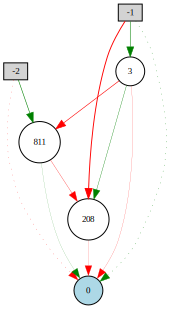

In [6]:
print("\nBest genome:\n{!s}".format(winner_list[0]))

import graphviz
from visualize import draw_net
config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path,
    )
draw_net(config, winner_list[0])

In [7]:
winner_net = neat.nn.FeedForwardNetwork.create(winner_list[0], config)
outputs = []
for xi, xo in zip(x_inputs, x_outputs):
    output = winner_net.activate(xi)
    outputs.append(output)
    print("input {!r}, expected output {!r}, got {!r}".format(
        xi, xo, output))

input (-0.5248998278920965, 0.480162618369909), expected output (0.8695005871604716,), got [0.8816117883853012]
input (-0.3981314176523991, 0.1718663366192441), expected output (0.7869127444636627,), got [0.8674292027258245]
input (-0.5703354858904419, 0.5546498351504752), expected output (0.882351462229165,), got [0.8836536698501034]
input (-0.5376537317613376, 0.3426075557978614), expected output (0.8721709960901513,), got [0.8822819591424028]
input (0.4435239083602754, 0.4223846842899663), expected output (0.8643590915934408,), got [0.8795120973421869]
input (0.4349666116381843, 0.4870229847491967), expected output (0.8392408474215771,), got [0.8794509510967573]
input (-0.0192929339356497, -0.4270590331162908), expected output (0.7826441575709259,), got [0.7027920749772117]
input (0.03826804392503607, -0.17777509391711435), expected output (0.536120339637599,), got [0.7056513263561797]
input (-0.19013751615667224, 0.6509731896614632), expected output (0.8759090474036749,), got [0.77

input (-0.04775206049068199, -0.28767208178670295), expected output (0.7140244563674253,), got [0.7084327010252475]
input (-0.764519807093881, 0.8099103708231472), expected output (0.9006131665126939,), got [0.886671193859568]
input (-0.01478140588840899, 0.7891942813589528), expected output (0.890236073016584,), got [0.7022706154047289]
input (-0.030847876233698092, 0.5754954613535881), expected output (0.7950496718491414,), got [0.7046101176471619]
input (-0.8836399526784201, -0.36666609235485), expected output (0.8258971034802576,), got [0.8868892343370377]
input (-0.8331072976249178, 0.7140634705626752), expected output (0.9174901282781365,), got [0.8868330410631607]
input (-0.8368702103289636, 0.49662767615075487), expected output (0.9125431285331217,), got [0.8868130966475691]
input (0.3040717158222807, -0.683863074163796), expected output (0.876066125020886,), got [0.8736619840284251]
input (-0.6634119024478968, -0.6389252712407989), expected output (0.8711928951357285,), got [0

input (-0.5179581889546594, 0.41104132536193055), expected output (0.8659379179677787,), got [0.8812074263778908]
input (-0.577714198913144, -0.6354881179555257), expected output (0.8490724493557873,), got [0.8839001927349465]
input (0.9319118899996308, 0.5171477410822014), expected output (0.8995902906739738,), got [0.8797605369921787]
input (-0.3336337686426917, 0.28410059812730304), expected output (0.7824573567190637,), got [0.8508369257164824]
input (-0.8721390334881771, 0.3690661475834649), expected output (0.8955963142595871,), got [0.8868739101563697]
input (0.6136424513068015, -0.3136620766755829), expected output (0.8560641481620176,), got [0.8797701126167148]
input (0.8289606156074709, -0.40954119569095826), expected output (0.9002773501386586,), got [0.8797618516268623]
input (-0.5333009725752547, -0.15967543672441223), expected output (0.8565541712034168,), got [0.8820623507239459]
input (0.5495677329558777, -0.9818133044666644), expected output (0.8552088028971029,), got 

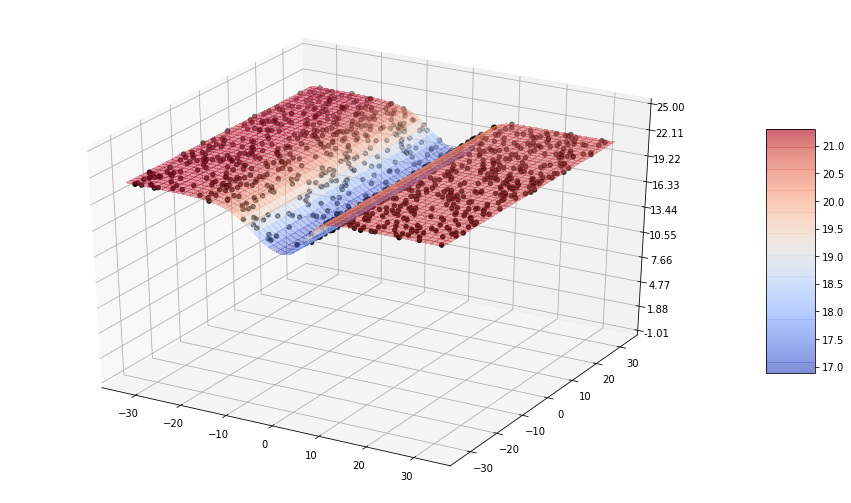

In [8]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize = (16,9))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-32.768, 32.768, 0.25)
Y = np.arange(-32.768, 32.768, 0.25)
X, Y = np.meshgrid(X, Y)

OZ = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        a = np.array([X[i][j]/32.768,Y[i][j]/32.768])
        OZ.append(winner_net.activate(tuple(a)))
OZ = np.array(OZ).reshape(X.shape)

Z = OZ*24
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.4)

# Customize the z axis.
ax.set_zlim(-1.01, 25)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

outputs = []
for xi in x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)

x = []
y = []
z = []
for i in range(1000):
    x.append(x_inputs[i][0]*32.768)
    y.append(x_inputs[i][1]*32.768)
    z.append(outputs[i][0]*24)

ax.scatter(x, y, z, c='k', marker='o')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

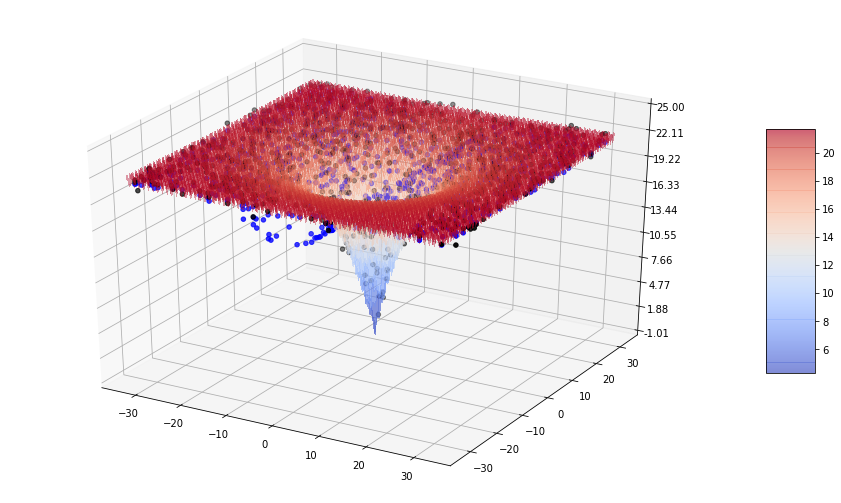

In [9]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize = (16,9))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-32.768, 32.768, 0.25)
Y = np.arange(-32.768, 32.768, 0.25)
X, Y = np.meshgrid(X, Y)

Z = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        a = np.array([X[i][j],Y[i][j]])
        Z.append(ackley(a))
Z = np.array(Z).reshape(X.shape)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.4)

# Customize the z axis.
ax.set_zlim(-1.01, 25)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


x = []
y = []
z = []
for i in range(1000):
    x.append(x_inputs[i][0]*32.768)
    y.append(x_inputs[i][1]*32.768)
    z.append(x_outputs[i][0]*24)

ax.scatter(x, y, z, c='k', marker='o')


x = []
y = []
z = []
for i in range(1000):
    x.append(x_inputs[i][0]*32.768)
    y.append(x_inputs[i][1]*32.768)
    z.append(outputs[i][0]*24)

ax.scatter(x, y, z, c='b', marker='o')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [10]:
xi = tuple([0,0])
xo = [tuple([0])]
output = winner_net.activate(xi)
print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

input (0, 0), expected output [(0,)], got [0.7013607835352058]


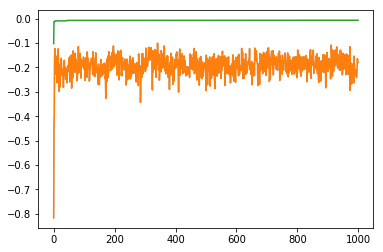

In [11]:
avg_fitness_list = []
best_list = []

for i in range(1):
    generation = range(len(stats_list[i].get_fitness_mean()))
    avg_fitness = np.array(stats_list[i].get_fitness_mean())
    avg_fitness_list.append(avg_fitness)
    best_fitness = [c.fitness for c in stats_list[i].most_fit_genomes]
    best_list.append(best_fitness)

    plt.plot(generation, avg_fitness, alpha = 0.4)
    #plt.plot(generation, best_fitness, alpha = 0.4)

plt.plot(generation, np.average(np.array(avg_fitness_list),axis = 0), label="Average")
plt.plot(generation, np.average(np.array(best_list),axis = 0), label="Best")


plt.show()